In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm

In [97]:
inp_df = pd.read_csv("data/prices_round_2_day_0.csv",delimiter=";")
inp_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000,0
1,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990,0
2,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980,0
3,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970,0
4,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950,0
...,...,...,...,...,...,...,...,...
9996,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0
9997,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0
9998,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0
9999,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260,0


In [98]:
df1 = pd.DataFrame(inp_df["ORCHIDS"]).reset_index(drop=True)
df2 = pd.DataFrame(inp_df["SUNLIGHT"]).reset_index(drop=True)
df3 = pd.DataFrame(inp_df["HUMIDITY"]).reset_index(drop=True)

In [99]:
df3

,HUMIDITY
0,95.000000
1,94.995990
2,94.991980
3,94.987970
4,94.983950
...,...
9996,64.989100
9997,64.991806
9998,64.994530
9999,64.997260


In [100]:
df_info = pd.concat([df1,df2,df3],axis=1)
df_info

,ORCHIDS,SUNLIGHT,HUMIDITY
0,1111.75,4500.0000,95.000000
1,1111.75,4500.0356,94.995990
2,1109.75,4500.0700,94.991980
3,1109.25,4500.1016,94.987970
4,1110.75,4500.1313,94.983950
...,...,...,...
9996,988.25,1703.5710,64.989100
9997,988.00,1702.6835,64.991806
9998,988.75,1701.7925,64.994530
9999,986.75,1700.8980,64.997260


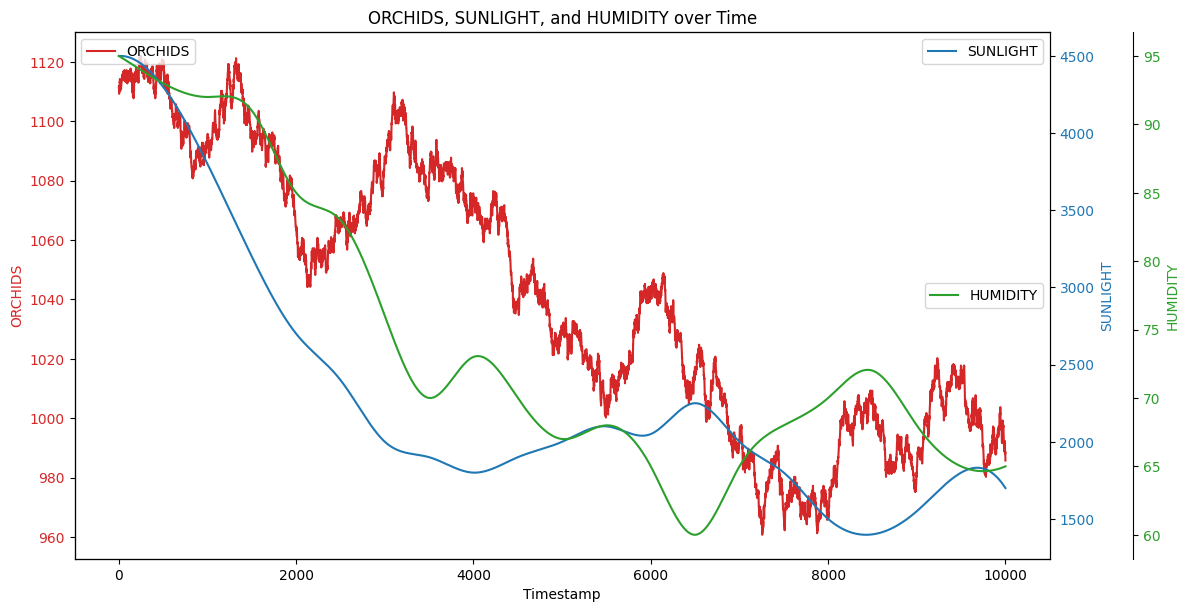

In [101]:
import matplotlib.pyplot as plt

df_index = df_info.index
# Plot all columns on the same figure
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot ORCHIDS on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(df_index, df_info['ORCHIDS'], color=color, label='ORCHIDS')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for SUNLIGHT
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SUNLIGHT', color=color)
ax2.plot(df_index, df_info['SUNLIGHT'], color=color, label='SUNLIGHT')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Create a third y-axis for HUMIDITY
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move the spine to the right
color = 'tab:green'
ax3.set_ylabel('HUMIDITY', color=color)
ax3.plot(df_index, df_info['HUMIDITY'], color=color, label='HUMIDITY')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='center right')

# Adjust layout to fit everything
fig.tight_layout()

plt.title('ORCHIDS, SUNLIGHT, and HUMIDITY over Time')
plt.show()



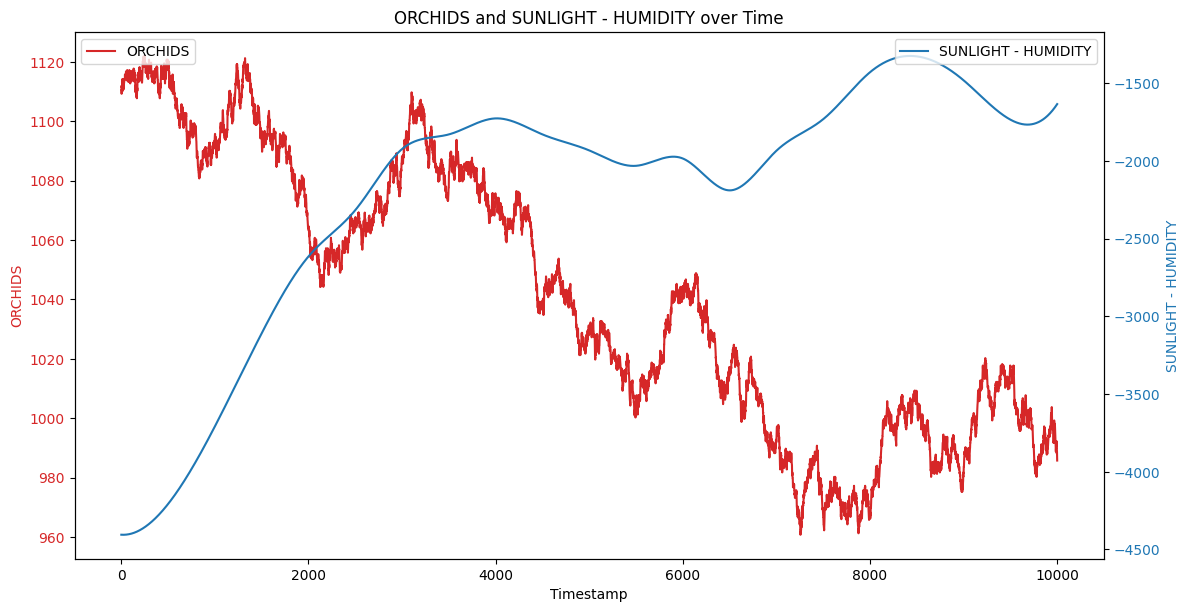

In [102]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
df_index = df_info.index
# Plot ORCHIDS on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS', color=color)
ax1.plot(df_index, df_info['ORCHIDS'], color=color, label='ORCHIDS')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for the difference between SUNLIGHT and HUMIDITY
ax2 = ax1.twinx()
color = 'tab:blue'
difference = df_info['HUMIDITY'] - df_info['SUNLIGHT']
ax2.set_ylabel('SUNLIGHT - HUMIDITY', color=color)
ax2.plot(df_index, difference, color=color, label='SUNLIGHT - HUMIDITY')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Adjust layout to fit everything
fig.tight_layout()

plt.title('ORCHIDS and SUNLIGHT - HUMIDITY over Time')
plt.show()


In [103]:
# Find the highest and lowest values of the 'SUNLIGHT' column
sunlight_highest = df_info['SUNLIGHT'].max()
sunlight_lowest = df_info['SUNLIGHT'].min()

# Find the highest and lowest values of the 'HUMIDITY' column
humidity_highest = df_info['HUMIDITY'].max()
humidity_lowest = df_info['HUMIDITY'].min()

# Print in the desired format
print(f"{sunlight_lowest}-{sunlight_highest}")
print(f"{humidity_lowest}-{humidity_highest}")


1397.3049-4500.338
59.99958-95.0


In [104]:
def calculate_percentile(x, y, z):
    return ((z - x) / (y - x)) * 100

In [105]:
calculate_percentile(0,40,35)

87.5